In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import pickle



import warnings
warnings.filterwarnings('ignore')

In [7]:
data = pd.read_csv('https://github.com/dsrscientist/Data-Science-ML-Capstone-Projects/raw/master/baseball.csv')

data.head()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


###### Data Dictionary:

- W – Win: number of games where pitcher was pitching while their team took the lead and went on to win, also the starter needs to pitch at least 5 innings of work (also related: winning percentage)
- R – Runs scored: number of times a player crosses home plate
- AB – At bat: plate appearances, not including bases on balls, being hit by pitch, sacrifices, interference, or obstruction
- H – Hit: reaching base because of a batted, fair ball without error by the defense
- 2B – Double: hits on which the batter reaches second base safely without the contribution of a fielding error
- 3B – Triple: hits on which the batter reaches third base safely without the contribution of a fielding error
- HR – Home runs: hits on which the batter successfully touched all four bases, without the contribution of a fielding error
- BB – Base on balls (also called a "walk"): hitter not swinging at four pitches called out of the strike zone and awarded first base.
- K – Strike out (also abbreviated SO): number of times that a third strike is taken or swung at and missed, or bunted foul. Catcher must catch the third strike or batter may attempt to run to first base.
- SB – Stolen base: number of bases advanced by the runner while the ball is in the possession of the defense
- RA – Run average: number of runs allowed times nine divided by innings pitched
- ER – Earned run: number of runs that did not occur as a result of errors or passed balls
- ERA – Earned run average: total number of earned runs (see "ER" above), multiplied by 9, divided by innings pitched
- CG – Complete game: number of games where player was the only pitcher for their team
- SHO – Shutout: number of complete games pitched with no runs allowed
- SV – Save: number of games where the pitcher enters a game led by the pitcher's team, finishes the game without surrendering the lead, is not the winning pitcher, and either (a) the lead was three runs or fewer when the pitcher entered the game; (b) the potential tying run was on base, at bat, or on deck; or (c) the pitcher pitched three or more innings
- E – Errors: number of times a fielder fails to make a play he should have made with common effort, and the offense benefits as a result

In [8]:
data.shape

(30, 17)

In [9]:
data.rename(columns = {'2B': 'Double', '3B':'Triple'}, inplace = True)

data.head()

,W,R,AB,H,Double,Triple,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   W       30 non-null     int64  
 1   R       30 non-null     int64  
 2   AB      30 non-null     int64  
 3   H       30 non-null     int64  
 4   Double  30 non-null     int64  
 5   Triple  30 non-null     int64  
 6   HR      30 non-null     int64  
 7   BB      30 non-null     int64  
 8   SO      30 non-null     int64  
 9   SB      30 non-null     int64  
 10  RA      30 non-null     int64  
 11  ER      30 non-null     int64  
 12  ERA     30 non-null     float64
 13  CG      30 non-null     int64  
 14  SHO     30 non-null     int64  
 15  SV      30 non-null     int64  
 16  E       30 non-null     int64  
dtypes: float64(1), int64(16)
memory usage: 4.1 KB


In [11]:
data.isnull().sum()

W         0
R         0
AB        0
H         0
Double    0
Triple    0
HR        0
BB        0
SO        0
SB        0
RA        0
ER        0
ERA       0
CG        0
SHO       0
SV        0
E         0
dtype: int64

In [12]:
data.describe()

,W,R,AB,H,Double,Triple,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


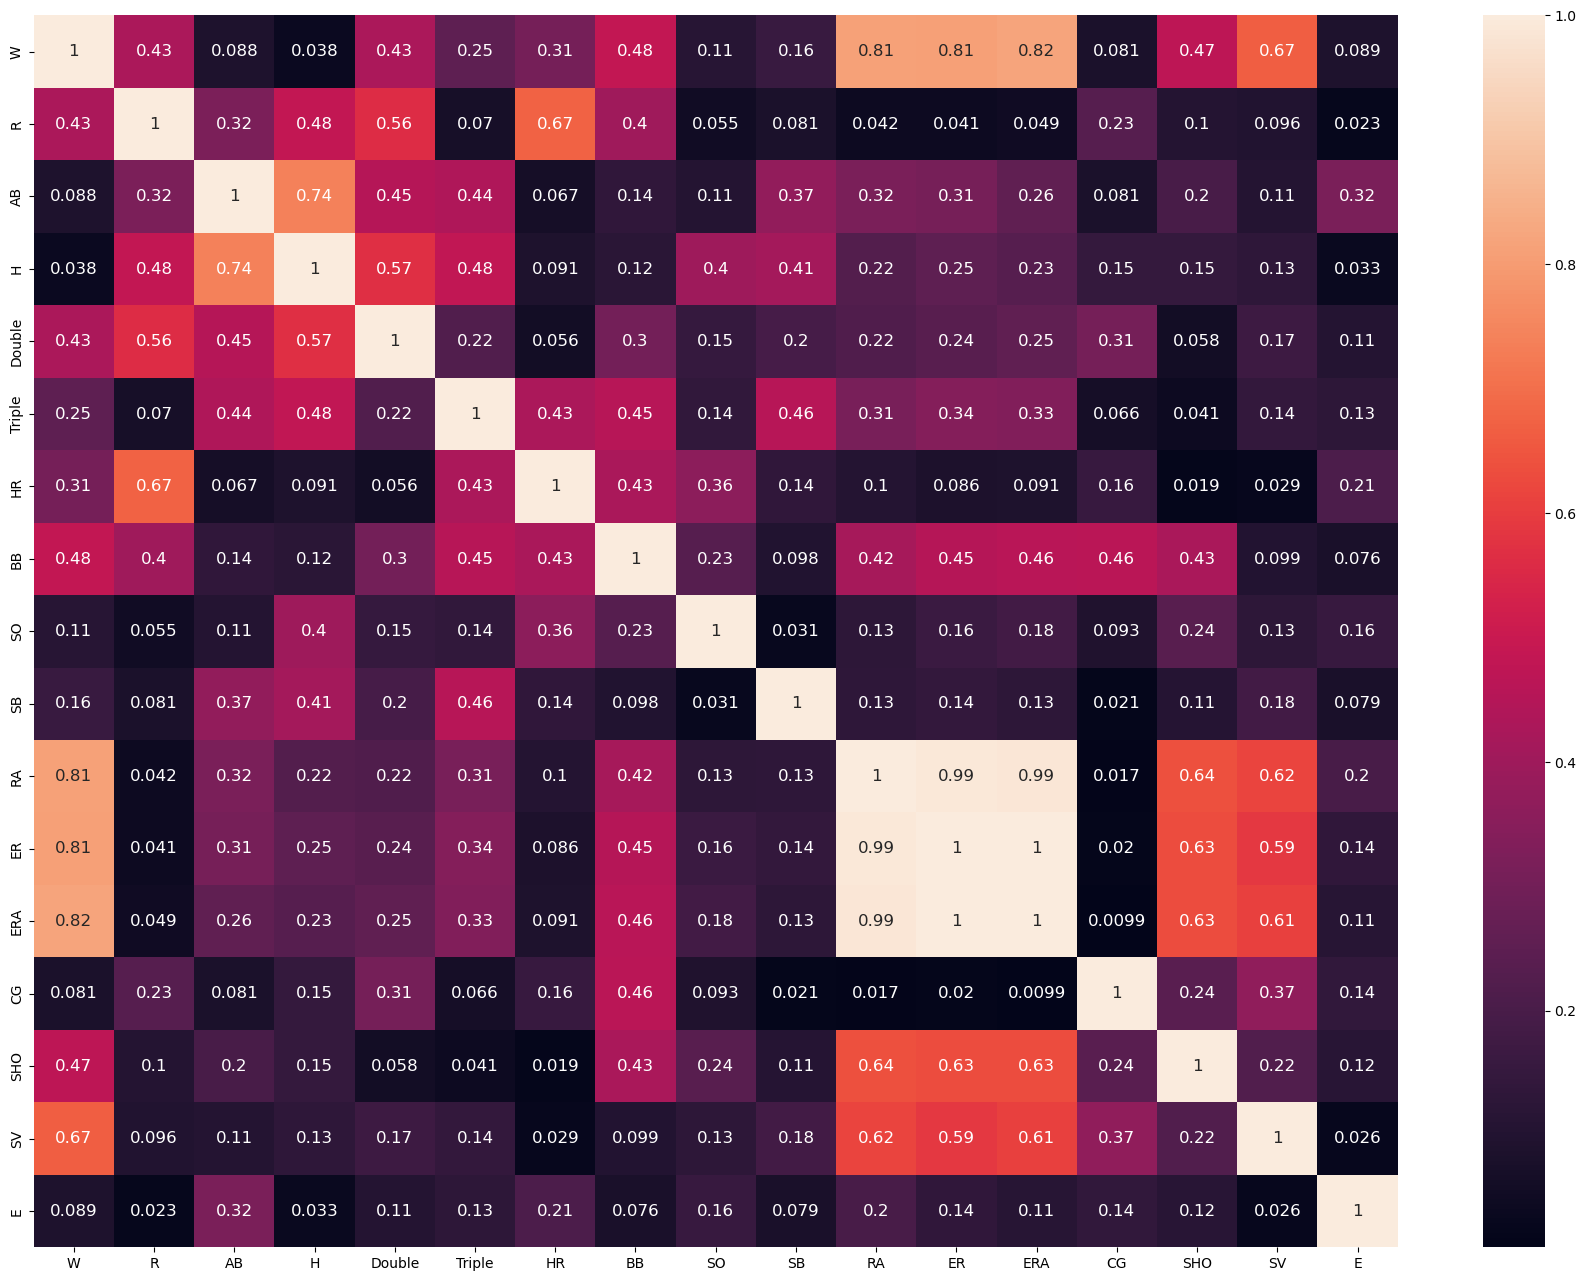

In [13]:
data_corr = data.corr().abs()

plt.figure(figsize = (22,16))
sns.heatmap(data_corr, annot = True, annot_kws={'size':12})
plt.show()

Observations:
- There seems to be strong correlation between RA, ER and ERA variables. We will check the same using VIF.
- R, ER and ERA having strong relation with Target variable W, we will check the same using Hypothesis Testing and Intercept.
- AB and H, are having correlation values as 0.74, all other variables are having very less correlation values.

## Univariate Analysis

<Axes: xlabel='R', ylabel='Density'>

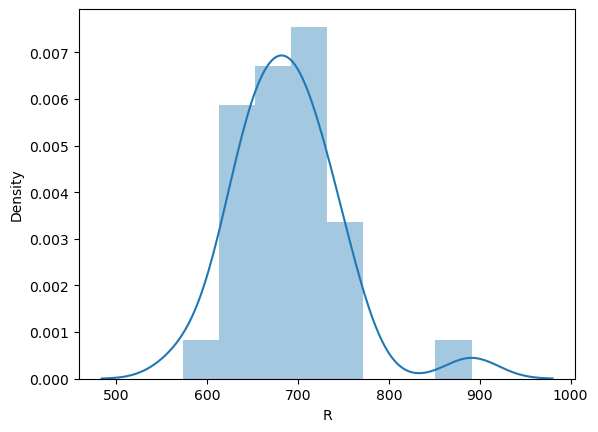

In [14]:
sns.distplot(data.R)

<Axes: xlabel='AB', ylabel='Density'>

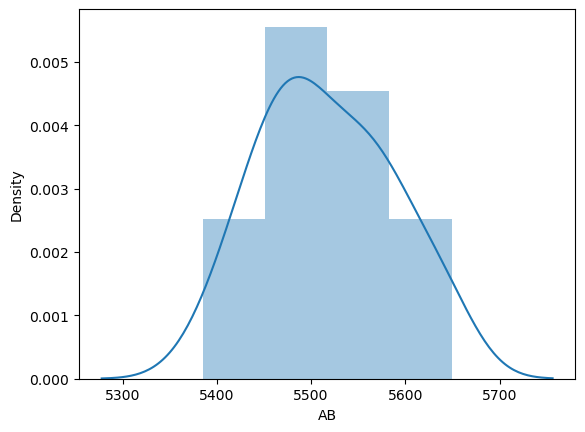

In [15]:
sns.distplot(data.AB)

<Axes: xlabel='H', ylabel='Density'>

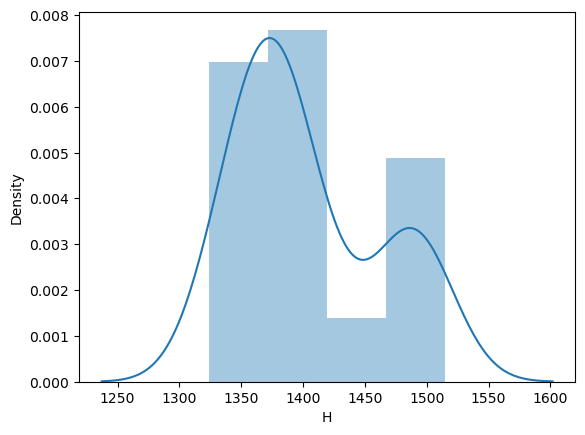

In [16]:
sns.distplot(data.H)

<Axes: xlabel='Double', ylabel='Density'>

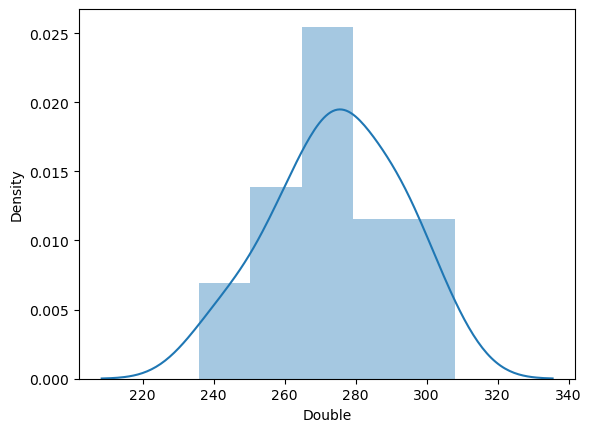

In [17]:
sns.distplot(data.Double)

<Axes: xlabel='Triple', ylabel='Density'>

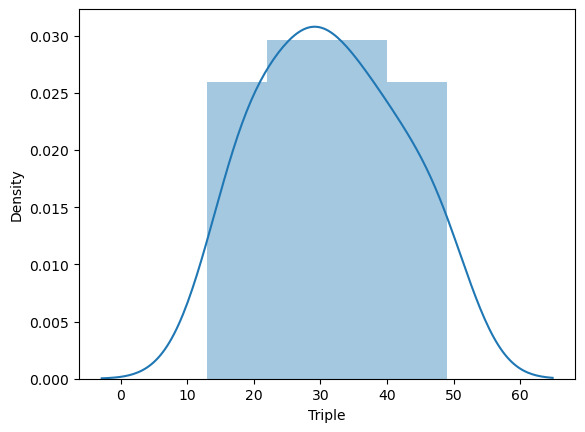

In [18]:
sns.distplot(data.Triple)

<Axes: xlabel='HR', ylabel='Density'>

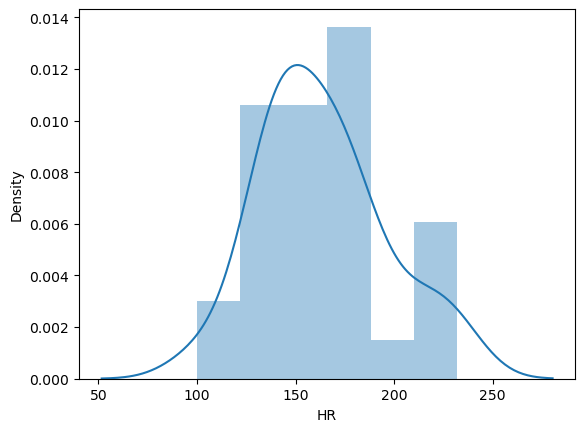

In [19]:
sns.distplot(data.HR)

<Axes: xlabel='BB', ylabel='Density'>

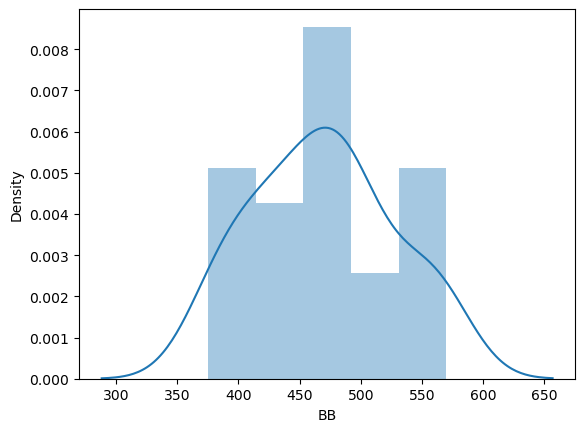

In [20]:
sns.distplot(data.BB)

<Axes: xlabel='SO', ylabel='Density'>

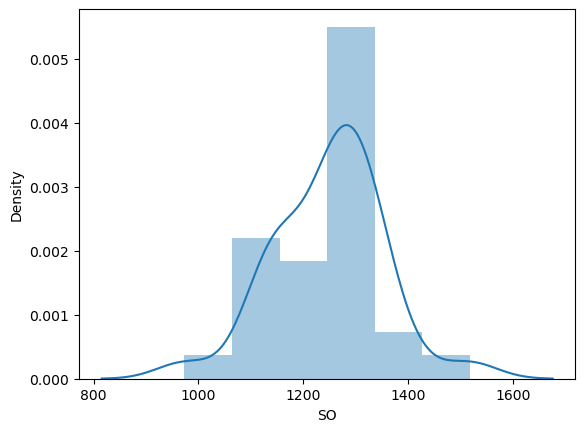

In [21]:
sns.distplot(data.SO)

<Axes: xlabel='SB', ylabel='Density'>

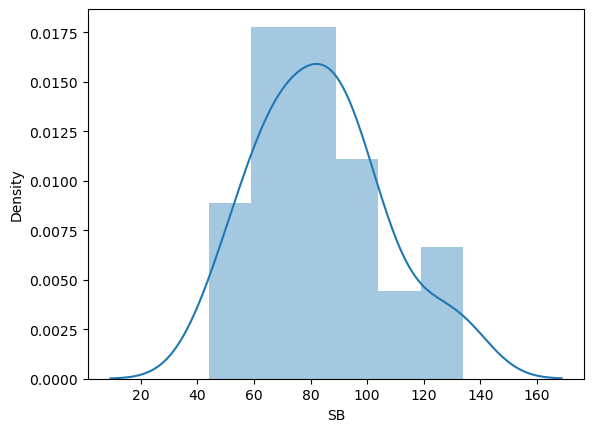

In [22]:
sns.distplot(data.SB)

<Axes: xlabel='RA', ylabel='Density'>

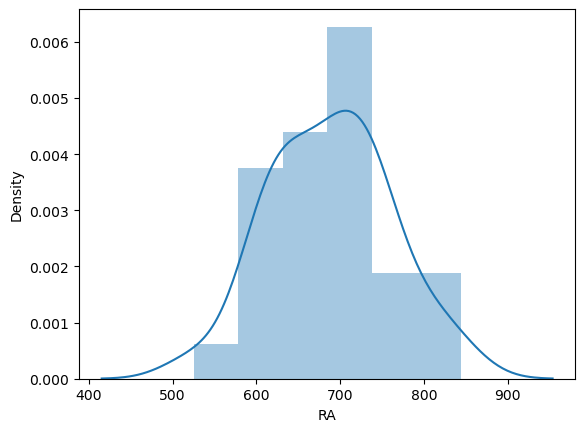

In [23]:
sns.distplot(data.RA)

<Axes: xlabel='ER', ylabel='Density'>

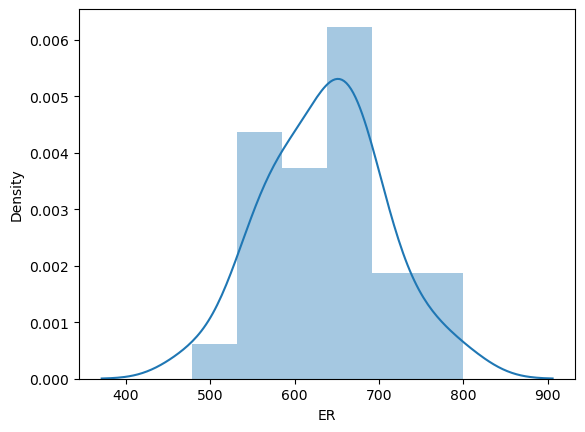

In [24]:
sns.distplot(data.ER)

<Axes: xlabel='ERA', ylabel='Density'>

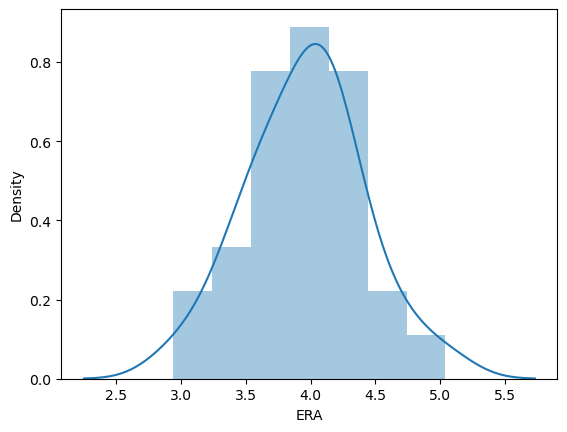

In [25]:
sns.distplot(data.ERA)

<Axes: xlabel='CG', ylabel='Density'>

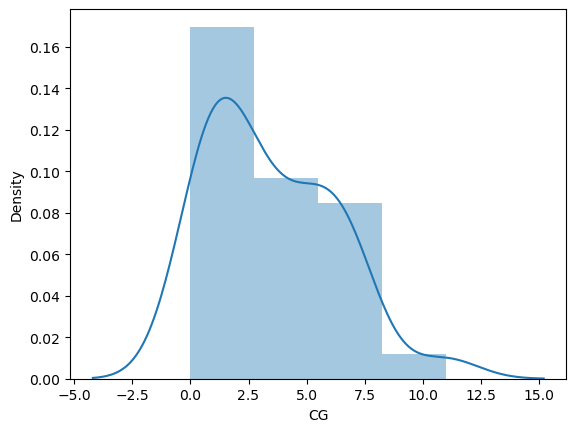

In [26]:
sns.distplot(data.CG)

<Axes: xlabel='SHO', ylabel='Density'>

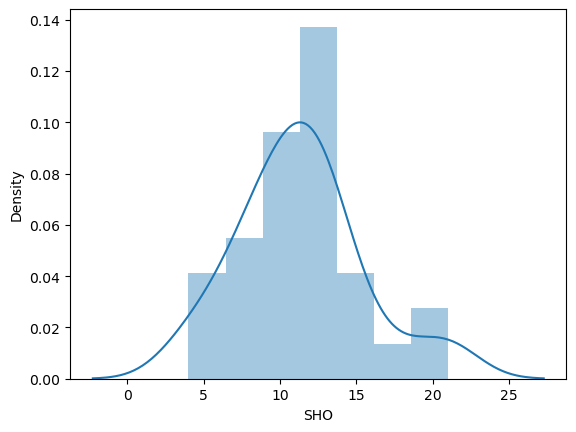

In [27]:
sns.distplot(data.SHO)

<Axes: xlabel='SV', ylabel='Density'>

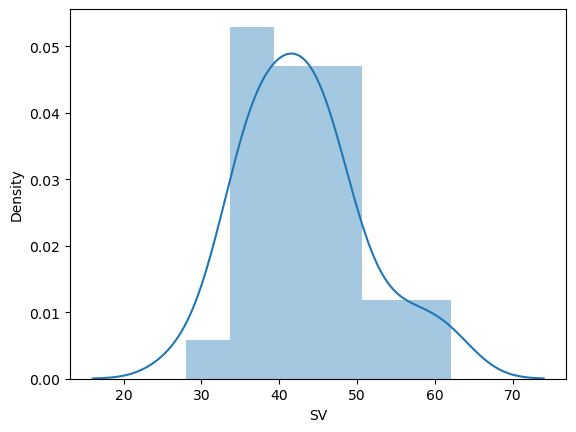

In [28]:
sns.distplot(data.SV)

<Axes: xlabel='E', ylabel='Density'>

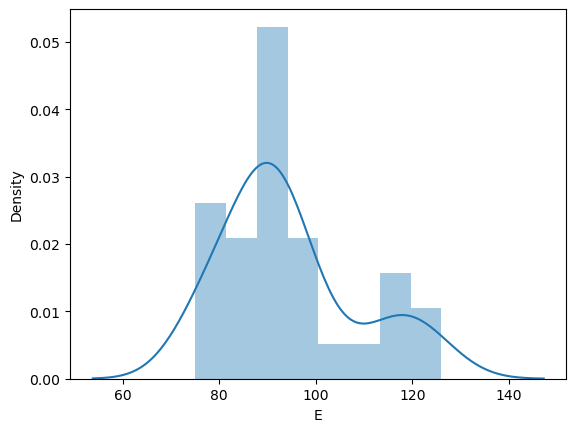

In [29]:
sns.distplot(data.E)

There seems to be some skewness in the data, we will check for the same.

# Bivariate Analysis

<Axes: xlabel='R', ylabel='W'>

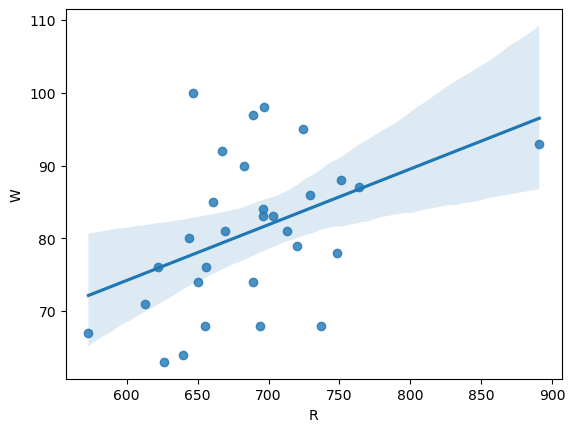

In [30]:
sns.regplot(x='R', y='W', data=data)

<Axes: xlabel='ER', ylabel='W'>

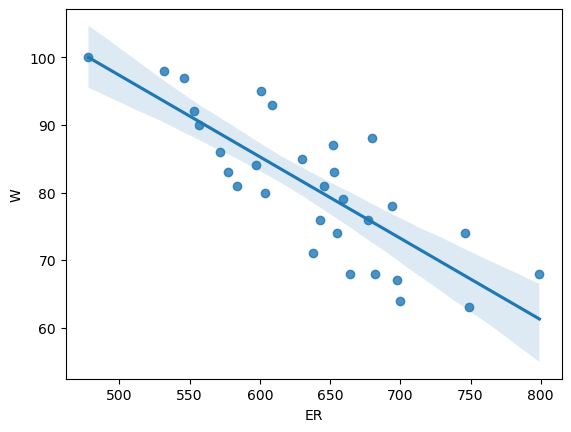

In [31]:
sns.regplot(x='ER', y='W', data=data)

<Axes: xlabel='ERA', ylabel='W'>

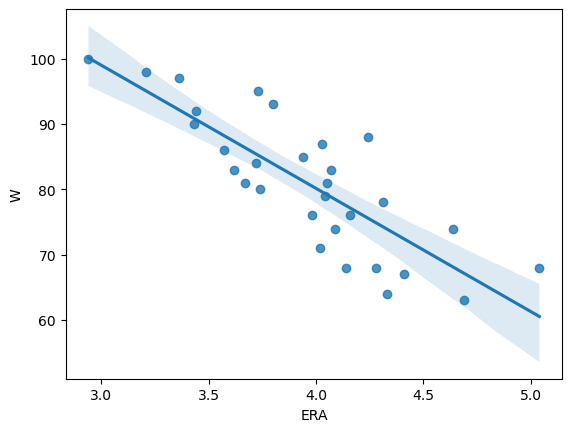

In [32]:
sns.regplot(x='ERA', y='W', data=data)

Both ER and ERA variables are negativly related with the Target variable W, whereas R(Run) is having positive linear relation with Target Variable W.

<Axes: xlabel='R', ylabel='ER'>

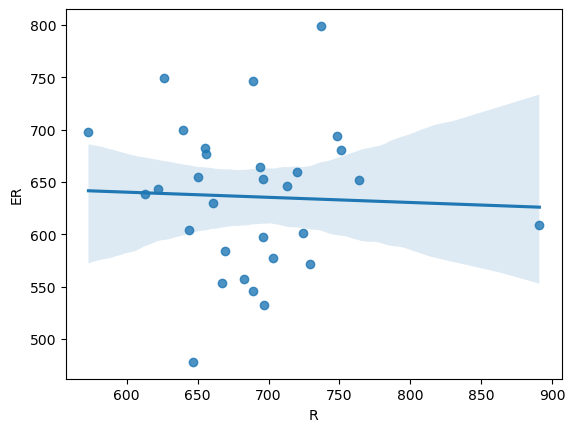

In [33]:
sns.regplot(x='R', y='ER', data=data)

<Axes: xlabel='R', ylabel='ERA'>

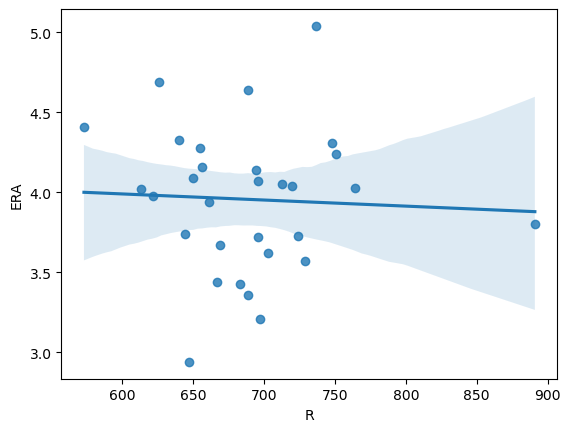

In [34]:
sns.regplot(x='R', y='ERA', data=data)

<Axes: xlabel='ER', ylabel='ERA'>

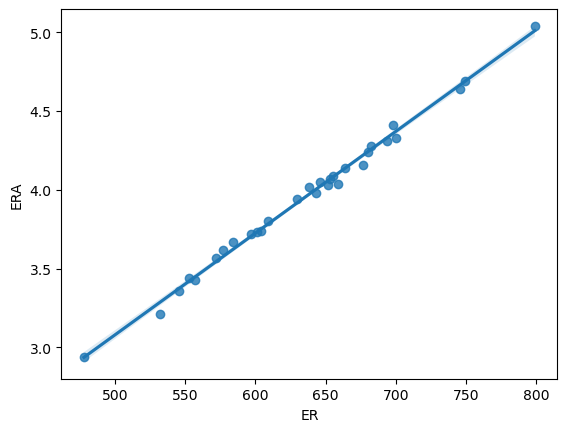

In [35]:
sns.regplot(x='ER', y='ERA', data=data)

It can be clearly seen that R is very weakly realted with ER and ERA, but ER and ERA has a very strongly relation amongst them.

<Axes: xlabel='H', ylabel='W'>

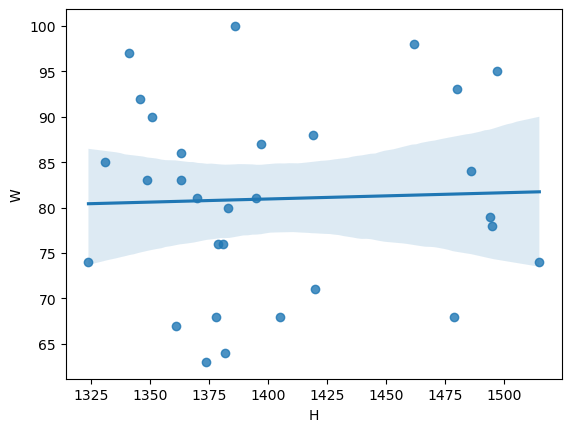

In [36]:
sns.regplot(x='H', y='W', data=data)

<Axes: xlabel='AB', ylabel='W'>

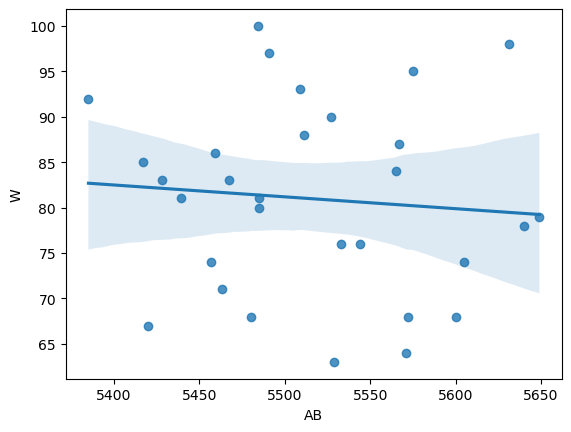

In [37]:
sns.regplot(x='AB', y='W', data=data)

<Axes: xlabel='H', ylabel='AB'>

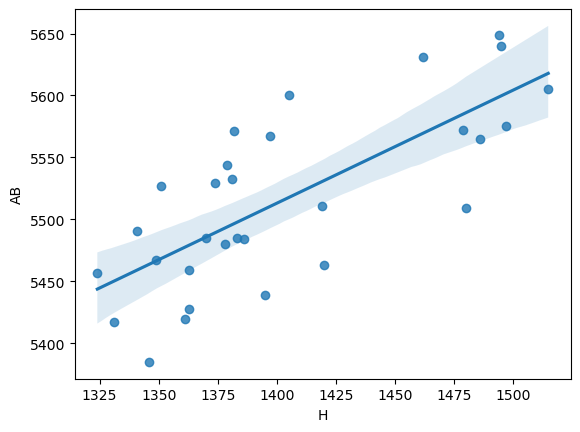

In [38]:
sns.regplot(x='H', y='AB', data=data)

H and AB, both are very weakly related with Win, whereas they are strongly related with each other.

# Checking Skewness

In [39]:
x = data.drop(columns = ['W'])
y = data['W']

In [40]:
x.skew().sort_values(ascending = False)

R         1.200786
E         0.890132
CG        0.736845
H         0.670254
SV        0.657524
SHO       0.565790
HR        0.516441
SB        0.479893
AB        0.183437
BB        0.158498
Triple    0.129502
ER        0.058710
ERA       0.053331
RA        0.045734
SO       -0.156065
Double   -0.230650
dtype: float64

There seems to be skewness present in the data, ranging from -0.23 to +1.20.

Therefore, we will use power_transformation function to remove skewness.

In [41]:
from sklearn.preprocessing import power_transform
x_new = power_transform(x)

In [42]:
pd.DataFrame(x_new, columns = x.columns).skew().sort_values(ascending = False)

AB        0.090410
E         0.063909
SO        0.041170
SHO       0.006560
ERA       0.001746
SV        0.000836
H         0.000000
HR       -0.000065
ER       -0.001940
BB       -0.007760
RA       -0.008082
SB       -0.010455
Double   -0.035315
R        -0.055006
CG       -0.059785
Triple   -0.072933
dtype: float64

Now, we can see the skewness is removed.

In [43]:
x = pd.DataFrame(x_new, columns = x.columns)

x.head()

,R,AB,H,Double,Triple,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,0.728218,0.858727,4.996004e-16,1.477685,1.033103,-0.764626,-1.610915,-2.569896,0.939708,-0.660331,-0.497425,-0.500893,-0.359844,-0.789579,1.546378,-0.334953
1,0.261212,-0.701451,-3.053113e-16,0.084269,1.203320,-0.158581,-0.502749,0.134913,-0.539693,0.175465,0.257974,0.261806,-0.359844,0.251775,0.360444,-0.532211
2,-0.244821,-1.126097,0.000000e+00,1.670782,-0.160270,-0.689676,1.128294,-0.901254,0.211956,-0.674621,-0.746906,-0.636459,1.993513,-0.245393,-0.607594,-1.342331
3,-1.285129,0.267369,-8.326673e-17,-0.848600,-0.360521,-0.879049,-1.181207,-0.189628,-0.642564,0.189512,0.113575,0.060804,1.220103,-0.510759,-0.764453,0.678524
4,0.135622,1.267645,5.828671e-16,0.792183,1.616444,-0.329850,-0.206771,0.085459,0.079629,1.603228,1.582654,1.520959,1.220103,0.251775,-1.095010,-0.532211


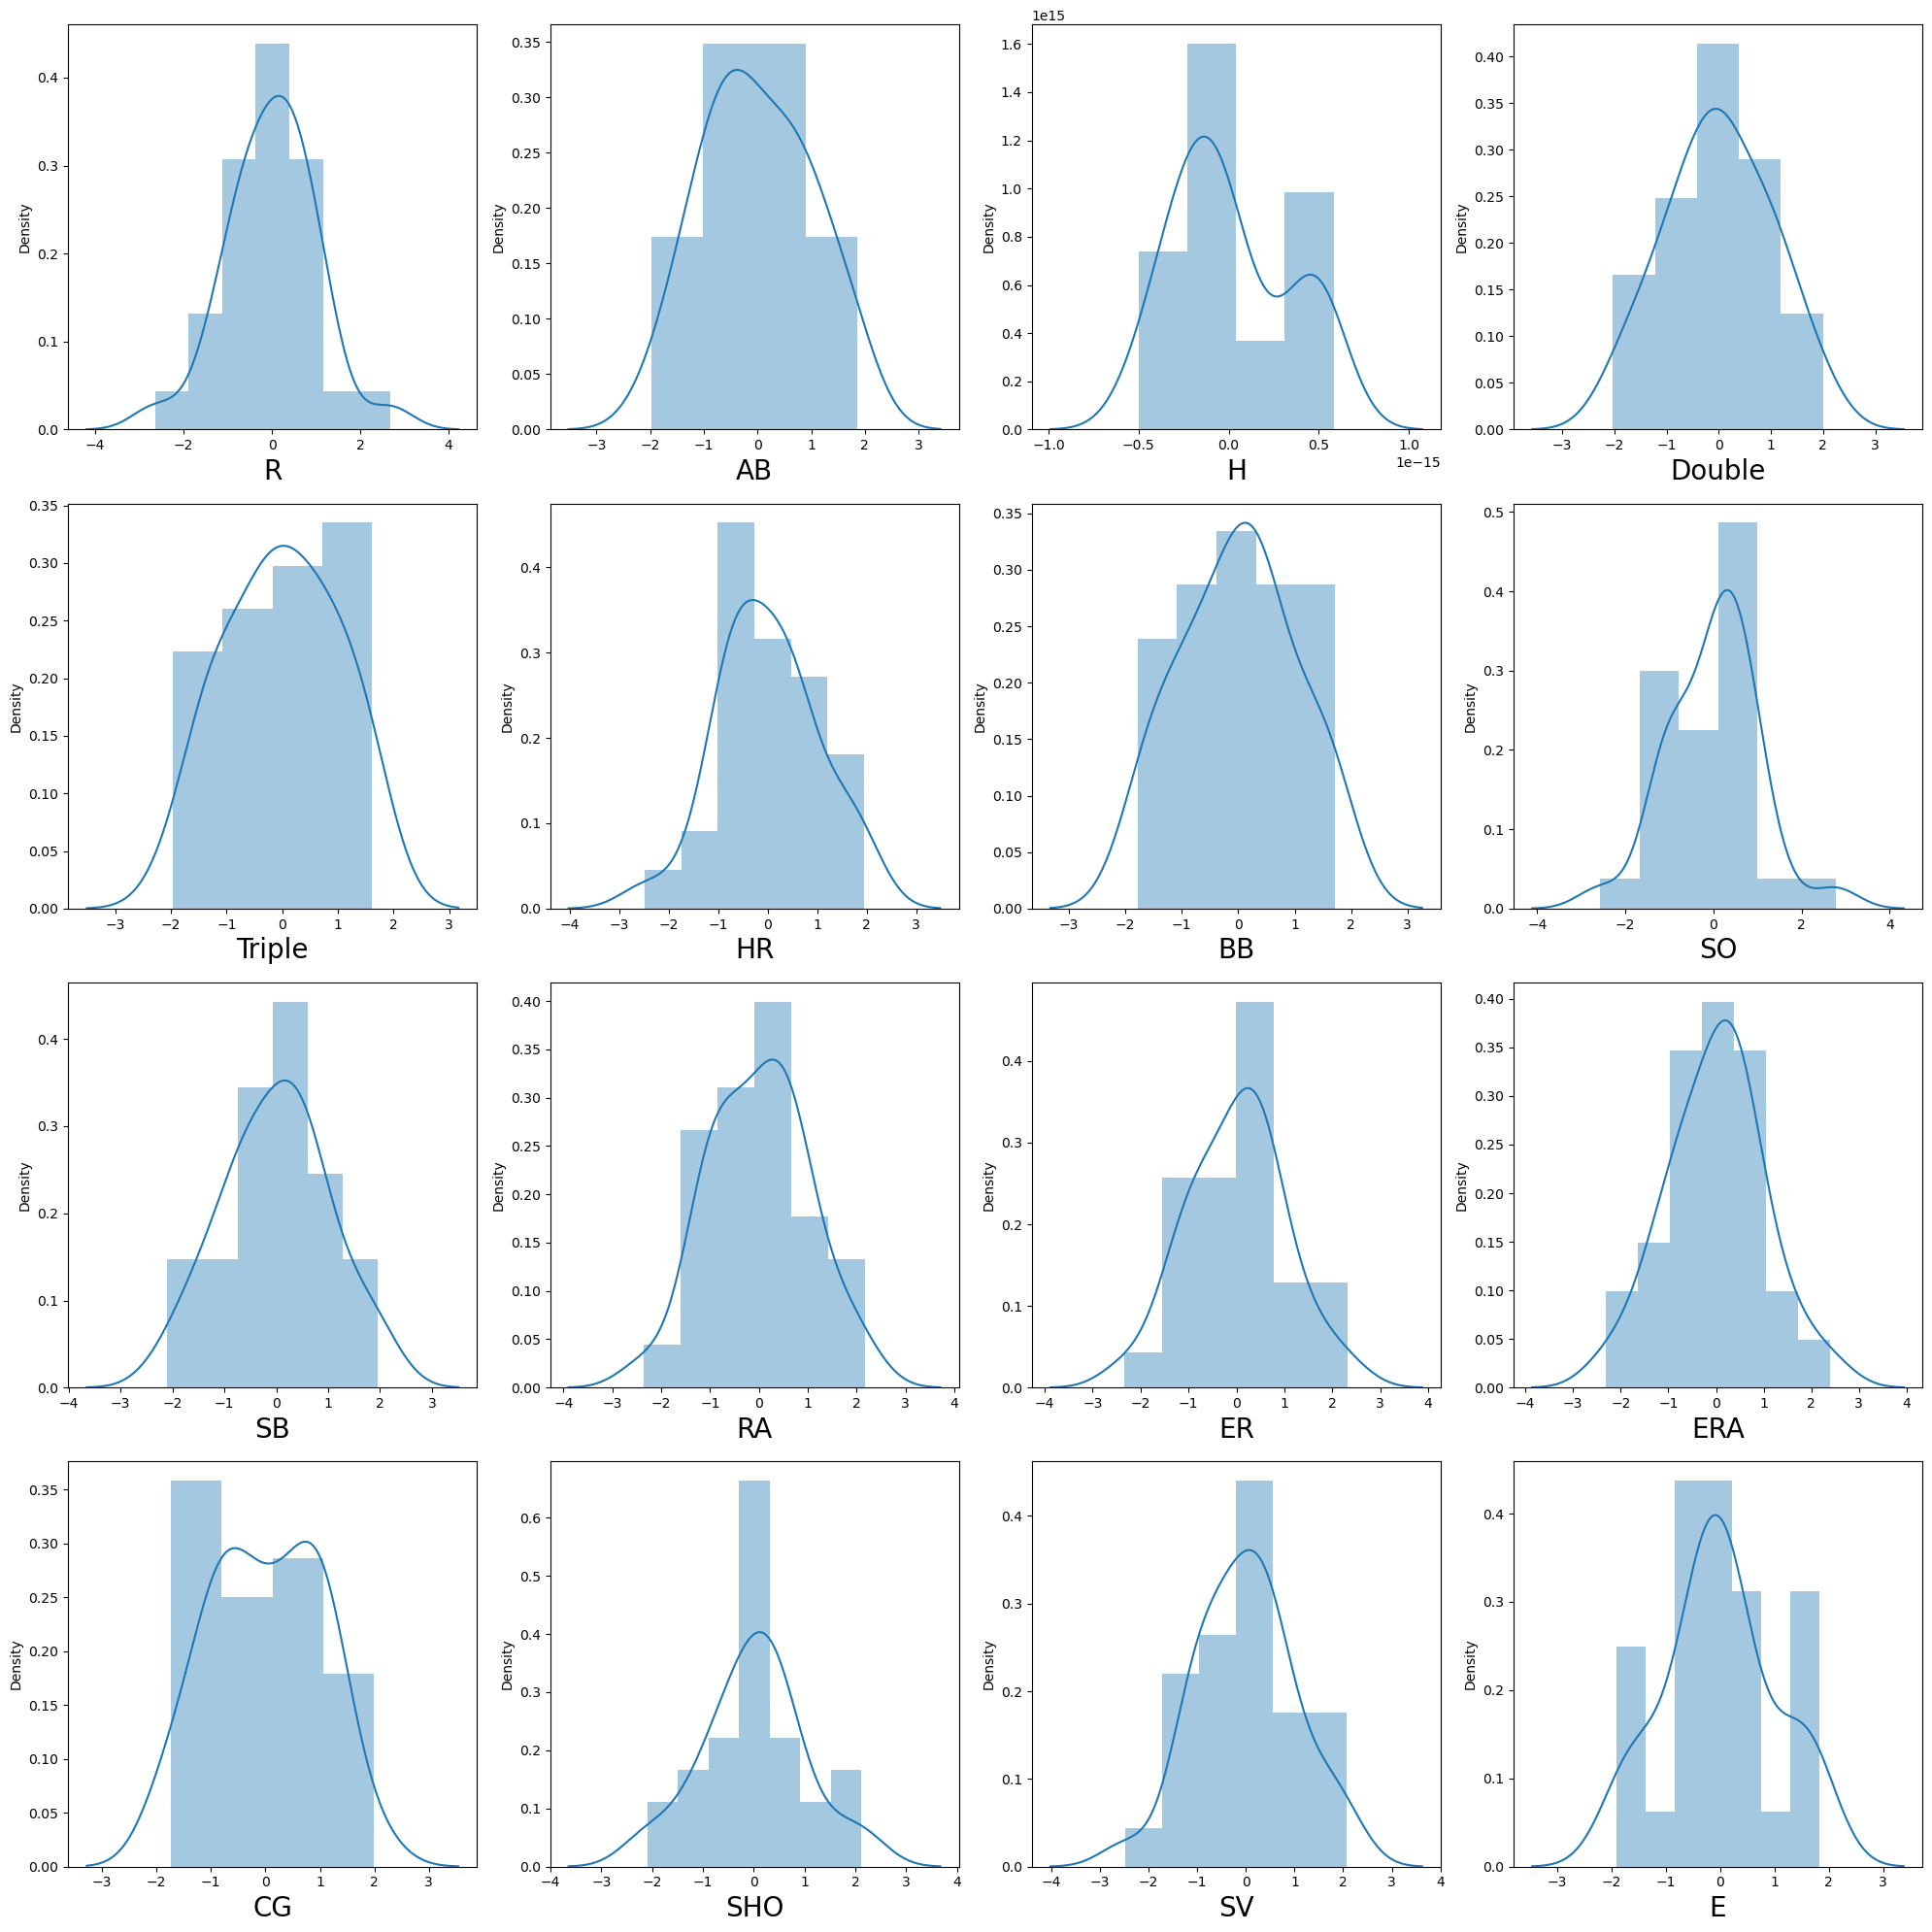

In [44]:
plt.figure(figsize = (20,20))
plotnumber = 1

for column in x:
    if plotnumber <= 16:
        ax = plt.subplot(4,4,plotnumber)
        sns.distplot(x[column])
        plt.xlabel(column, fontsize = 20)
    plotnumber +=1
plt.tight_layout()

After removal of skewness from the data, it looks perfectly normalized.

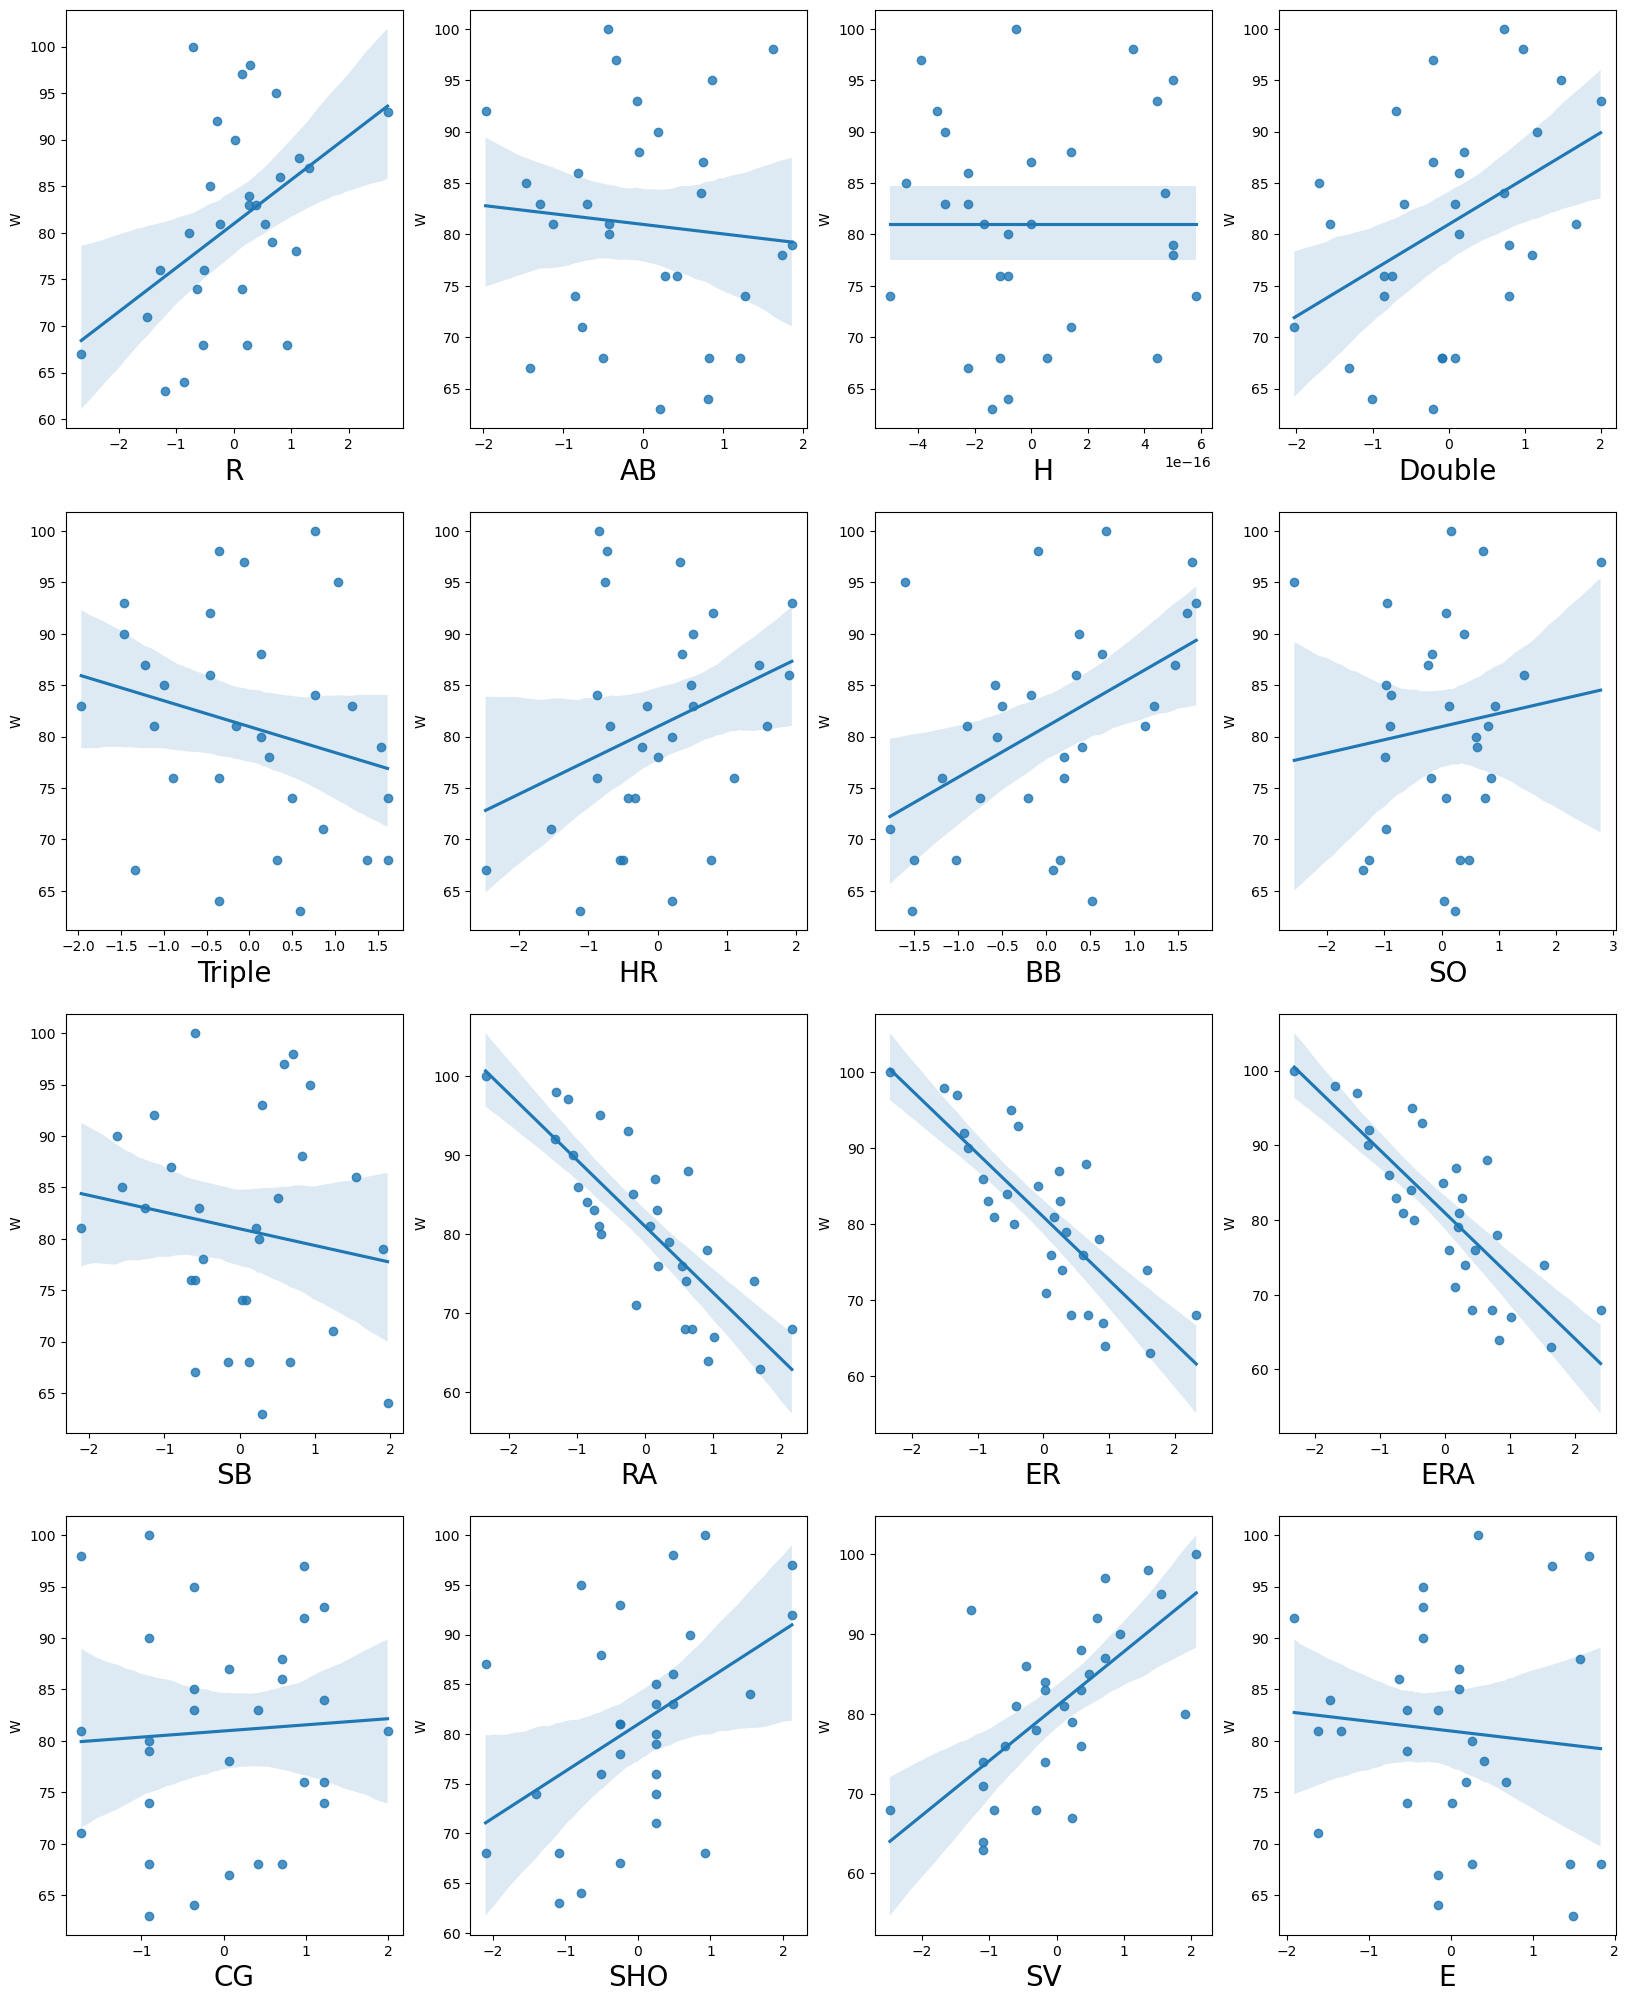

In [69]:
plt.figure(figsize=(20,25))
fignumber = 1

for column in x:
    if fignumber<= 16:
        ax = plt.subplot(4,4,fignumber)
        sns.regplot(x=x[column],y=y,data = x)
        plt.xlabel(column,fontsize=20)
    
    fignumber +=1
plt.show()

Observations:
- The R(number of runs), HR (home runs), 2B(doubles), SV(Saves), SHO(Shutouts), and BB(Walks) are highly positively linearly correlated.

- SB(Stolen Bases), RA(Runs Allowed), ER(Earned Runs), ERA(Earned Runs Average) are highly negative linearly correlated.

- The remaining features have less to no linear correlation with no of Wins.

# Checking Outliers

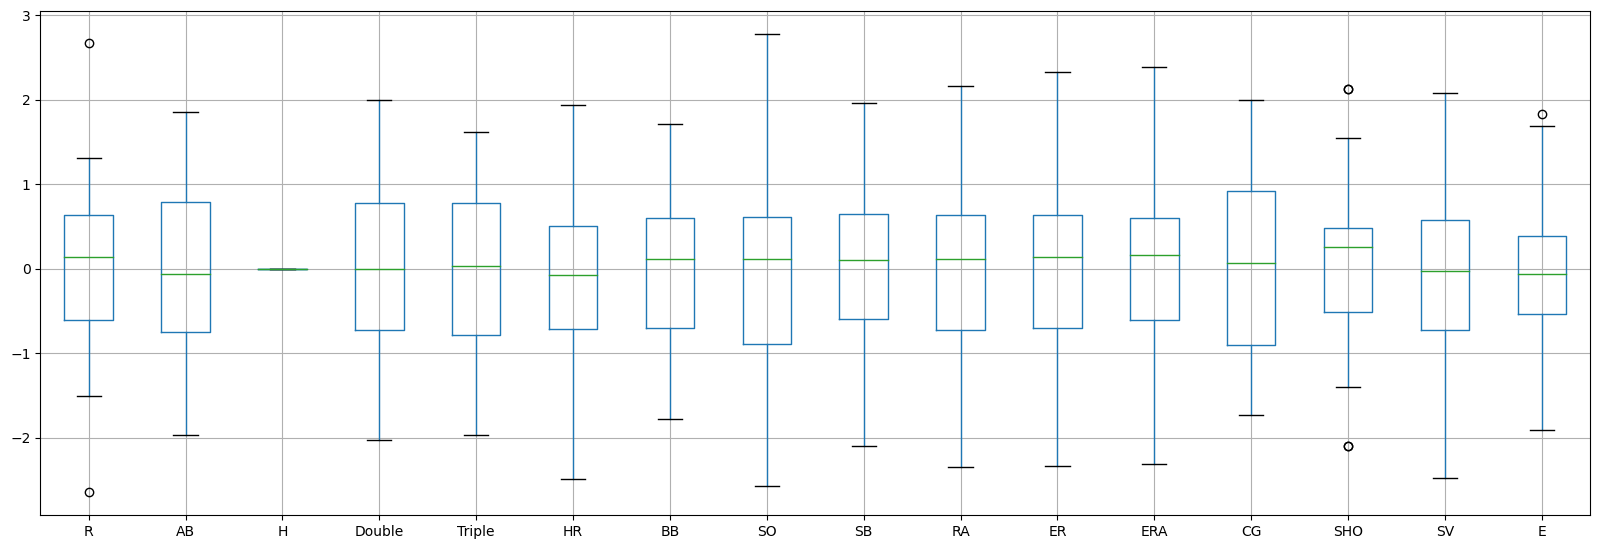

In [70]:
x.iloc[:,:].boxplot(figsize = (20,8))
plt.subplots_adjust(bottom=0.25)
plt.show()

It seems that all the data points are within the range of 3Z.

Let's check using Z-Score

In [71]:
from scipy.stats import zscore
(np.abs(zscore(x))<3).all()

R         True
AB        True
H         True
Double    True
Triple    True
HR        True
BB        True
SO        True
SB        True
RA        True
ER        True
ERA       True
CG        True
SHO       True
SV        True
E         True
dtype: bool

There is no Outlier present in the DataSet.

##### Checking Multicollinearity using VIF

In [72]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

x_scaled = scaler.fit_transform(x)

In [73]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()

vif['vif'] = [variance_inflation_factor(x_scaled, i) for i in range (x_scaled.shape[1])]

vif['features'] = x.columns


# Lets check the values 
vif

,vif,features
0,10.105172,R
1,13.097976,AB
2,7.691412,H
3,3.771955,Double
4,3.294036,Triple
5,11.029874,HR
6,3.503707,BB
7,2.822950,SO
8,2.238197,SB
9,222.525272,RA


AS the value of VIF is very high that means, There is a strong correlation between features. Therefore removing the feature with heighest VIF values and then will see the variation in VIF.

In [74]:
x_new = x.drop(columns = ['ER'], axis=1)

x_new.head()

,R,AB,H,Double,Triple,HR,BB,SO,SB,RA,ERA,CG,SHO,SV,E
0,0.728218,0.858727,4.996004e-16,1.477685,1.033103,-0.764626,-1.610915,-2.569896,0.939708,-0.660331,-0.500893,-0.359844,-0.789579,1.546378,-0.334953
1,0.261212,-0.701451,-3.053113e-16,0.084269,1.203320,-0.158581,-0.502749,0.134913,-0.539693,0.175465,0.261806,-0.359844,0.251775,0.360444,-0.532211
2,-0.244821,-1.126097,0.000000e+00,1.670782,-0.160270,-0.689676,1.128294,-0.901254,0.211956,-0.674621,-0.636459,1.993513,-0.245393,-0.607594,-1.342331
3,-1.285129,0.267369,-8.326673e-17,-0.848600,-0.360521,-0.879049,-1.181207,-0.189628,-0.642564,0.189512,0.060804,1.220103,-0.510759,-0.764453,0.678524
4,0.135622,1.267645,5.828671e-16,0.792183,1.616444,-0.329850,-0.206771,0.085459,0.079629,1.603228,1.520959,1.220103,0.251775,-1.095010,-0.532211


In [75]:
scaler = StandardScaler()

x_scaled = scaler.fit_transform(x_new)

In [76]:
vif = pd.DataFrame()

vif['vif'] = [variance_inflation_factor(x_scaled, i) for i in range (x_scaled.shape[1])]

vif['features'] = x_new.columns


# Lets check the values 
vif

,vif,features
0,8.426743,R
1,5.269672,AB
2,7.572972,H
3,3.536450,Double
4,3.249997,Triple
5,7.930197,HR
6,3.501556,BB
7,2.558839,SO
8,1.968825,SB
9,126.635153,RA


As it can be easily seen that there is a significant drop in VIF value, but still it is high, therefore removing the other feature with High vif value i.e. ER.

In [77]:
x_new = x_new.drop(columns = ['ERA'], axis=1)

x_new.head()

,R,AB,H,Double,Triple,HR,BB,SO,SB,RA,CG,SHO,SV,E
0,0.728218,0.858727,4.996004e-16,1.477685,1.033103,-0.764626,-1.610915,-2.569896,0.939708,-0.660331,-0.359844,-0.789579,1.546378,-0.334953
1,0.261212,-0.701451,-3.053113e-16,0.084269,1.203320,-0.158581,-0.502749,0.134913,-0.539693,0.175465,-0.359844,0.251775,0.360444,-0.532211
2,-0.244821,-1.126097,0.000000e+00,1.670782,-0.160270,-0.689676,1.128294,-0.901254,0.211956,-0.674621,1.993513,-0.245393,-0.607594,-1.342331
3,-1.285129,0.267369,-8.326673e-17,-0.848600,-0.360521,-0.879049,-1.181207,-0.189628,-0.642564,0.189512,1.220103,-0.510759,-0.764453,0.678524
4,0.135622,1.267645,5.828671e-16,0.792183,1.616444,-0.329850,-0.206771,0.085459,0.079629,1.603228,1.220103,0.251775,-1.095010,-0.532211


In [78]:
scaler = StandardScaler()

x_scaled = scaler.fit_transform(x_new)

In [79]:
vif = pd.DataFrame()

vif['vif'] = [variance_inflation_factor(x_scaled, i) for i in range (x_scaled.shape[1])]

vif['features'] = x_new.columns


# Lets check the values 
vif

,vif,features
0,8.320764,R
1,3.923048,AB
2,6.519210,H
3,3.256274,Double
4,2.963971,Triple
5,6.973421,HR
6,3.122691,BB
7,2.264705,SO
8,1.967539,SB
9,4.636032,RA


VIF values are reduced compared to earlier, and it ranges below 10 therefore, proceeding ahead with dataset.

# ML Models

In [80]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [81]:
max_r2_score = 0
maxRS = 0

for i in range(1,1000):
    x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size = 0.25, random_state = i)
    reg = LinearRegression()
    reg.fit(x_train, y_train)
    y_pred = reg.predict(x_test)
    r2score = r2_score(y_test,y_pred)
    print('r2_score', r2score*100,'%', 'random_state', i)
    
    if r2score > max_r2_score:
        max_r2_score = r2score
        maxRS = i
        print('r2_score', max_r2_score*100,'%', 'random_state', i)

r2_score 44.395362370908785 % random_state 1
r2_score 44.395362370908785 % random_state 1
r2_score -0.25351952476384554 % random_state 2
r2_score 68.7103501012843 % random_state 3
r2_score 68.7103501012843 % random_state 3
r2_score 65.9990709042631 % random_state 4
r2_score 75.17543680289329 % random_state 5
r2_score 75.17543680289329 % random_state 5
r2_score 59.190595689963764 % random_state 6
r2_score 79.74913601518035 % random_state 7
r2_score 79.74913601518035 % random_state 7
r2_score 59.0764309928695 % random_state 8
r2_score 66.4033444887621 % random_state 9
r2_score 38.44963641114877 % random_state 10
r2_score 39.201358773221514 % random_state 11
r2_score 61.548785427882514 % random_state 12
r2_score 72.37591880287265 % random_state 13
r2_score 61.460929651728605 % random_state 14
r2_score 45.24272092641315 % random_state 15
r2_score 58.70306178333702 % random_state 16
r2_score 0.2903588601349094 % random_state 17
r2_score -25.70439494950989 % random_state 18
r2_score 86.30831

In [82]:
print('Best R2 Score is', max_r2_score, 'on Random_state', maxRS)

Best R2 Score is 0.9651590038359961 on Random_state 384


In [83]:
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size = 0.25, random_state = 384)

In [84]:
reg = LinearRegression()
reg.fit(x_train, y_train)
y_pred = reg.predict(x_test)

In [85]:
print('Intercept: ', reg.intercept_)
print('Linear Coefficient: ', reg.coef_)

Intercept:  81.1390462631997
Linear Coefficient:  [ 6.10040008  0.01078089  0.07423176 -0.8653067  -0.68843261 -2.18225359
 -0.11167058  0.132499   -0.3162509  -5.22509701  1.5426205   0.6699268
  4.21729363  0.36101641]


In [86]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

print('R2 Score: ', r2_score(y_test, y_pred))

print("Mean Absolute Error: ", mean_absolute_error(y_test,y_pred))

print("Mean Squared Error: ", mean_squared_error(y_test,y_pred))

print("Square Root of Mean Square Error: ", np.sqrt(mean_squared_error(y_test,y_pred)))

R2 Score:  0.9651590038359961
Mean Absolute Error:  1.4785322098291953
Mean Squared Error:  2.6038200726942295
Square Root of Mean Square Error:  1.6136356691317373


Since there seems to be some relation between independent variable --> R (Run) and Target Variable --> W (Win), therefore applying Hypothesis Testing to identify whether relation between them exists or not.

# Hypothesis Testing and P-Values

- Ho = there is no relation between Run and Win.
- Ha = There exists a relation between Run and Win.

In [87]:
import statsmodels.formula.api as smf

lm = smf.ols(formula = 'W ~ R', data = data).fit()

lm.pvalues

Intercept    0.188745
R            0.017488
dtype: float64

- now since, the p-value is less than alpha value(i.e. 0.05), we reject the null hypothesis.
- which means, there exists a relation between the Run and Win.

In [88]:
lm.rsquared

0.18554602127597375

In [89]:
lm = LinearRegression()
lm.fit(x_scaled,y)

print('Intercept: ',lm.intercept_)
print('R: ', lm.coef_[0])
print('AB: ', lm.coef_[1])
print('H: ', lm.coef_[2])
print('Double: ', lm.coef_[3])
print('Triple: ', lm.coef_[4])
print('HR: ', lm.coef_[5])
print('BB: ', lm.coef_[6])
print('SO: ', lm.coef_[7])
print('SB: ', lm.coef_[8])
print('RA: ', lm.coef_[9])
print('CG: ', lm.coef_[10])
print('SHO: ', lm.coef_[11])
print('SV: ', lm.coef_[12])
print('E: ', lm.coef_[13])

Intercept:  80.96666666666667
R:  6.816357943221326
AB:  -0.28321527008959013
H:  -0.06440391281680855
Double:  -1.0558713205256802
Triple:  -0.5738151335905104
HR:  -2.443016897467326
BB:  -0.36091609288986365
SO:  0.2288070123447766
SB:  -0.2727594721840945
RA:  -5.277288585837429
CG:  1.4759649246204818
SHO:  0.798882653821049
SV:  4.322904082937047
E:  0.5455229200750874


In [90]:
lm = smf.ols(formula = 'W ~ R + AB + H + Double + Triple + HR + BB + SO + SB +RA + CG + SHO + SV + E', data = data).fit()

lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      W   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.876
Method:                 Least Squares   F-statistic:                     15.64
Date:                Tue, 01 Aug 2023   Prob (F-statistic):           1.82e-06
Time:                        22:46:19   Log-Likelihood:                -71.258
No. Observations:                  30   AIC:                             172.5
Df Residuals:                      15   BIC:                             193.5
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.1071     79.580      0.077      0.940    -163.514     175.728
R              0.1459      0.038      3.819      0.002       0.064       0.227
AB             0.0123      0.020      0.605      0.555      -0.031       0.055
H             -0.0253      0.035     -0.721      0.482      -0.100       0.049
Double        -0.1054      0.072     -1.458      0.166      -0.260       0.049
Triple        -0.0398      0.113     -0.351      0.730      -0.281       0.202
HR            -0.1056      0.059     -1.785      0.094      -0.232       0.020
BB            -0.0181      0.023     -0.804      0.434      -0.066       0.030
SO             0.0090      0.010      0.928      0.368      -0.012       0.030
SB            -0.0120      0.041     -0.296      0.771      -0.099       0.075
RA            -0.0680      0.021     -3.189      0.006      -0.114      -0.023
CG             0.8753      0.408      2.145      0.049       0.005       1.745
SHO            0.2593      0.305      0.850      0.409      -0.391       0.910
SV             0.6900      0.153      4.506      0.000       0.364       1.016
E             -0.0089      0.070     -0.126      0.901      -0.159       0.141
==============================================================================
Omnibus:                        7.233   Durbin-Watson:                   1.942
Prob(Omnibus):                  0.027   Jarque-Bera (JB):                5.532
Skew:                          -0.843   Prob(JB):                       0.0629
Kurtosis:                       4.257   Cond. No.                     7.03e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.03e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

##### Observations

1. P value for R, HR, SV and RA is very low, that means there is a strong relation between these variables and Win.

2. p value for E is 0.975, which is very high. we can assume that E does not have any significant effect on Win.

3. R2 and Adj. R2 values are 0.936 and 0.876 respectively, which means the intercept model is very good.

In [91]:
lm = smf.ols(formula = 'W ~ R+HR+RA+SV', data = data).fit()

lm.rsquared

0.8971237558371723

it is clear from R2 values for R, HR, RA and SV have correlation of about 89% with Win.

In [92]:
lm = smf.ols(formula = 'W ~ AB+E', data = data).fit()

lm.rsquared

0.011956169381316495

As observed above, AB and E does dont have any significant effect on win as they have only 1.1% correlation with Win.

In [93]:
lm = smf.ols(formula = 'W ~  H + Double + Triple + BB + SO + SB + CG + SHO', data = data).fit()

lm.rsquared

0.5489667438363381

All other data Points are only 54.8% correlated with Win.

In [94]:
def print_score(clf, x_train, x_test, y_train, y_test, train=True):
    if train:
        y_pred = clf.predict(x_train)
        
        print("\n====================Train Result======================")
        
        print(f"R2 Score: {r2_score(y_train, y_pred)}")
        
    elif train==False:
        pred = clf.predict(x_test)
        
        print("\n====================Test Result======================")
        
        print(f"R2 Score: {r2_score(y_test, pred)}")
        
        print(f"Root Mean Square Error : {np.sqrt(mean_squared_error(y_test,pred))} ")

In [95]:
reg = LinearRegression()

# Regression Model training and printing train and test score
reg.fit(x_train, y_train)

# call the function and pass dataset to check train and test score
print_score(reg, x_train, x_test, y_train, y_test, train=True)

print_score(reg, x_train, x_test, y_train, y_test, train=False)


====================Train Result======================
R2 Score: 0.9140729830503408

====================Test Result======================
R2 Score: 0.9651590038359961
Root Mean Square Error : 1.6136356691317373 


In [96]:
from sklearn.svm import SVC

svc = SVC()

# SVC Model training and printing train and test score
svc.fit(x_train, y_train)

# call the function and pass dataset to check train and test score
print_score(svc, x_train, x_test, y_train, y_test, train=True)

print_score(svc, x_train, x_test, y_train, y_test, train=False)


====================Train Result======================
R2 Score: 0.7269617120395981

====================Test Result======================
R2 Score: -1.4403094292285177
Root Mean Square Error : 13.504628836069505 


In [97]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor()

# RandomForestClassifier Model training and printing train and test score
rf.fit(x_train, y_train)

# call the function and pass dataset to check train and test score
print_score(rf, x_train, x_test, y_train, y_test, train=True)

print_score(rf, x_train, x_test, y_train, y_test, train=False)


====================Train Result======================
R2 Score: 0.9399481110787596

====================Test Result======================
R2 Score: 0.24062554881873277
Root Mean Square Error : 7.533350848062237 


In [98]:
import xgboost as xgb
xgb = xgb.XGBRegressor()

# XGBoost Regressor Model training and printing train and test score
xgb.fit(x_train, y_train)

# call the function and pass dataset to check train and test score
print_score(xgb, x_train, x_test, y_train, y_test, train=True)

print_score(xgb, x_train, x_test, y_train, y_test, train=False)


====================Train Result======================
R2 Score: 0.9999999970279948

====================Test Result======================
R2 Score: 0.1023958987431196
Root Mean Square Error : 8.190352953619866 


In [99]:
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor()

# KNN Regressor Model training and printing train and test score
knn.fit(x_train, y_train)

# call the function and pass dataset to check train and test score
print_score(knn, x_train, x_test, y_train, y_test, train=True)

print_score(knn, x_train, x_test, y_train, y_test, train=False)


====================Train Result======================
R2 Score: 0.7717848303974377

====================Test Result======================
R2 Score: 0.5061844030942921
Root Mean Square Error : 6.074948559452995 


###### Amongst the ML Models, Linear Regression has the best R2 score. Therefore, Let's perform Cross validation(Ridge and Lasso) and Parameter Tuning(Model Regularization using Ridge and Lasso) on Linear Regression Model.

# Model Regularization Method

In [100]:
from sklearn.linear_model import Ridge, Lasso, RidgeCV, LassoCV

In [107]:
lasscv = LassoCV(alphas = None, max_iter = 100)
lasscv.fit(x_train, y_train)

LassoCV(max_iter=100)

In [108]:
alpha = lasscv.alpha_

alpha

1.4406216109705976

In [109]:
lasso_reg = Lasso(alpha)

lasso_reg.fit(x_train,y_train)

Lasso(alpha=1.4406216109705976)

In [110]:
lasso_reg.score(x_test,y_test)

0.7703860826528106

# Ridge CV

In [112]:
ridgecv = RidgeCV(alphas = np.arange(0.001,2,0.01))

ridgecv.fit(x_train,y_train)

RidgeCV(alphas=array([1.000e-03, 1.100e-02, 2.100e-02, 3.100e-02, 4.100e-02, 5.100e-02,
       6.100e-02, 7.100e-02, 8.100e-02, 9.100e-02, 1.010e-01, 1.110e-01,
       1.210e-01, 1.310e-01, 1.410e-01, 1.510e-01, 1.610e-01, 1.710e-01,
       1.810e-01, 1.910e-01, 2.010e-01, 2.110e-01, 2.210e-01, 2.310e-01,
       2.410e-01, 2.510e-01, 2.610e-01, 2.710e-01, 2.810e-01, 2.910e-01,
       3.010e-01, 3.110e-01, 3.210e-0...
       1.621e+00, 1.631e+00, 1.641e+00, 1.651e+00, 1.661e+00, 1.671e+00,
       1.681e+00, 1.691e+00, 1.701e+00, 1.711e+00, 1.721e+00, 1.731e+00,
       1.741e+00, 1.751e+00, 1.761e+00, 1.771e+00, 1.781e+00, 1.791e+00,
       1.801e+00, 1.811e+00, 1.821e+00, 1.831e+00, 1.841e+00, 1.851e+00,
       1.861e+00, 1.871e+00, 1.881e+00, 1.891e+00, 1.901e+00, 1.911e+00,
       1.921e+00, 1.931e+00, 1.941e+00, 1.951e+00, 1.961e+00, 1.971e+00,
       1.981e+00, 1.991e+00]))

In [113]:
alpha = ridgecv.alpha_

alpha

1.9909999999999997

In [114]:
ridge_model = Ridge(alpha)

ridge_model.fit(x_train,y_train)

Ridge(alpha=1.9909999999999997)

In [115]:
ridge_model.score(x_test,y_test)

0.7855254442975175

###### Model Saving

In [116]:
# Saving the Model

import joblib
joblib.dump(reg, "Baseball_Case_Study.pkl")

['Baseball_Case_Study.pkl']